In [12]:
import pandas as pd

In [17]:
import pystats

#t_tests as pairwise_t_tests

pairwise_t_tests()

TypeError: 'module' object is not callable

In [16]:

data = [
    [1.2, 1.3, 1.5, 1.6, 1.7],
    [2.1, 2.2, 2.3, 2.5, 2.6],
    [3.0, 3.2, 3.4, 3.6, 3.8],
]

results = pairwise_t_tests(data)

for i, j, t_stat, p_value in results:
    print(f"Group {i} vs Group {j}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


TypeError: 'module' object is not callable

In [19]:
from statsky_notes import pairwise_t_test

data = [
    [1.2, 1.3, 1.5, 1.6, 1.7],
    [2.1, 2.2, 2.3, 2.5, 2.6],
    [3.0, 3.2, 3.4, 3.6, 3.8],
]

results = pairwise_t_test(data)

for i, j, t_stat, p_value in results:
    print(f"Group {i} vs Group {j}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


ImportError: cannot import name 'pairwise_t_test' from 'statsky_notes' (/Users/david/git-repos/StatSkyNotes/statsky_notes/__init__.py)

In [ ]:
data = [
    [1.2, 1.3, 1.5, 1.6, 1.7],
    [2.1, 2.2, 2.3, 2.5, 2.6],
    [3.0, 3.2, 3.4, 3.6, 3.8],
]

results = pairwise_t_tests(data)

for i, j, t_stat, p_value in results:
    print(f"Group {i} vs Group {j}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")


In [25]:
from scipy.stats import ttest_ind

def pairwise_t_tests(data):
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []

    # Iterate over all pairs of groups
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            group1 = data[i]
            group2 = data[j]

            # Perform t-test and store the result
            t_stat, p_value = ttest_ind(group1, group2)
            results.append((i, j, t_stat, p_value))

    return results



In [26]:
data = [
    [1.2, 1.3, 1.5, 1.6, 1.7],
    [2.1, 2.2, 2.3, 2.5, 2.6],
    [3.0, 3.2, 3.4, 3.6, 3.8],
]

results = pairwise_t_tests(data)

for i, j, t_stat, p_value in results:
    print(f"Group {i} vs Group {j}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")



Group 0 vs Group 1: t-statistic = -6.710, p-value = 0.000
Group 0 vs Group 2: t-statistic = -11.471, p-value = 0.000
Group 1 vs Group 2: t-statistic = -6.268, p-value = 0.000


SyntaxError: invalid syntax (957578844.py, line 2)

In [48]:
pairwise_t_tests(data)




[(0, 1, -6.709937094634608, 0.00015115040806165856),
 (0, 2, -11.471460482188204, 3.01962156922524e-06),
 (1, 2, -6.2679113974842755, 0.0002409916452179639)]

In [49]:
from typing import Callable, Any
from tqdm import tqdm
import time

class ProgressBar:
    def __init__(self, func: Callable[..., Any]):
        self.func = func

    def __call__(self, *args, **kwargs):
        # Set up the progress bar
        with tqdm(total=100) as pbar:
            # Wrap the original function with a progress-updating function
            def update_progress(*args, **kwargs):
                result = self.func(*args, **kwargs)
                pbar.update(1)
                return result

            # Call the original function with the progress-updating wrapper
            result = update_progress(*args, **kwargs)

            # Wait until the progress bar is full
            while pbar.n < pbar.total:
                pbar.update(0)
                time.sleep(0.1)

            return result


import time

def dummy_function(seconds: float):
    time.sleep(seconds)


# Wrap the dummy_function with a progress bar
progress_dummy_function = ProgressBar(dummy_function)

# Call the wrapped function
#progress_dummy_function(.1)


In [52]:
prog_pairwise_t_tests = ProgressBar(pairwise_t_tests)
prog_pairwise_t_tests(data)

  1%|          | 1/100 [00:29<47:52, 29.02s/it]


KeyboardInterrupt: 

In [53]:
from typing import List, Tuple
from scipy.stats import ttest_ind
from tqdm import tqdm

def pairwise_t_tests(data: List[List[float]]) -> List[Tuple[int, int, float, float]]:
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []
    num_comparisons = len(data) * (len(data) - 1) // 2
    with tqdm(total=num_comparisons) as pbar:
        # Iterate over all pairs of groups
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                group1 = data[i]
                group2 = data[j]

                # Perform t-test and store the result
                t_stat, p_value = ttest_ind(group1, group2)
                results.append((i, j, t_stat, p_value))

                pbar.update(1)

    return results


In [57]:
from typing import List, Tuple
from scipy.stats import ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def pairwise_t_tests(data: List[List[float]]) -> List[Tuple[int, int, float, float]]:
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []
    num_comparisons = len(data) * (len(data) - 1) // 2
    with tqdm(total=num_comparisons) as pbar:
        # Iterate over all pairs of groups
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                group1 = data[i]
                group2 = data[j]

                # Perform t-test and store the result
                t_stat, p_value = ttest_ind(group1, group2)
                results.append((i, j, t_stat, p_value))

                # Create a bar plot of the two groups
                fig, ax = plt.subplots()
                ax.bar([f'Group {i+1}', f'Group {j+1}'], [np.mean(group1), np.mean(group2)])
                ax.set_ylabel('Mean')
                ax.set_title(f'Comparison of Group {i+1} and Group {j+1}')

                pbar.update(1)

    return results


In [ ]:
from typing import List, Tuple
from scipy.stats import ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def pairwise_t_tests(data: List[List[float]]) -> List[Tuple[int, int, float, float]]:
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []
    num_comparisons = len(data) * (len(data) - 1) // 2
    with tqdm(total=num_comparisons) as pbar:
        # Iterate over all pairs of groups
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                group1 = data[i]
                group2 = data[j]

                # Perform t-test and store the result
                t_stat, p_value = ttest_ind(group1, group2)
                results.append((i, j, t_stat, p_value))

                # Create a bar plot of the two groups with confidence interval bars
                fig, ax = plt.subplots()
                means = [np.mean(group1), np.mean(group2)]
                sems = [np.std(group1) / np.sqrt(len(group1)), np.std(group2) / np.sqrt(len(group2))]
                cis = [1.96 * sem for sem in sems]
                ax.bar([f'Group {i+1}', f'Group {j+1}'], means, yerr=cis, capsize=10)
                ax.set_ylabel('Mean')
                ax.set_title(f'Comparison of Group {i+1} and Group {j+1}')

                pbar.update(1)

    return results


In [60]:
from typing import List, Tuple
from scipy.stats import ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def pairwise_t_tests(data: List[List[float]]) -> List[Tuple[int, int, float, float]]:
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []
    num_comparisons = len(data) * (len(data) - 1) // 2
    with tqdm(total=num_comparisons) as pbar:
        # Iterate over all pairs of groups
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                group1 = data[i]
                group2 = data[j]

                # Perform t-test and store the result
                t_stat, p_value = ttest_ind(group1, group2)
                results.append((i, j, t_stat, p_value))

                # Create a bar plot of the two groups with confidence interval bars
                fig, ax = plt.subplots()
                means = [np.mean(group1), np.mean(group2)]
                sems = [np.std(group1) / np.sqrt(len(group1)), np.std(group2) / np.sqrt(len(group2))]
                cis = [1.96 * sem for sem in sems]
                ax.bar([f'Group {i+1}', f'Group {j+1}'], means, yerr=cis, capsize=10)
                ax.set_ylabel('Mean')
                ax.set_title(f'Comparison of Group {i+1} and Group {j+1}')

                pbar.update(1)

    return results


In [79]:
from typing import List, Tuple
from scipy.stats import ttest_ind
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

def pairwise_t_tests(data: List[List[float]]) -> List[Tuple[int, int, float, float]]:
    """
    Perform pairwise t-tests on experimental data.

    :param data: A list of lists, where each inner list represents a group of experimental data.
    :return: A list of tuples, each tuple containing four values: the indices of the two groups being compared,
             the t-statistic, and the p-value.
    """
    results = []
    num_comparisons = len(data) * (len(data) - 1) // 2
    with tqdm(total=num_comparisons) as pbar:
        # Iterate over all pairs of groups
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                group1 = data[i]
                group2 = data[j]

                # Perform t-test and store the result
                t_stat, p_value = ttest_ind(group1, group2)
                results.append((i, j, t_stat, p_value))

                # Create a bar plot of the two groups with colored confidence interval bars
                fig, ax = plt.subplots()
                means = [np.mean(group1), np.mean(group2)]
                sems = [np.std(group1) / np.sqrt(len(group1)), np.std(group2) / np.sqrt(len(group2))]
                cis = [1.96 * sem for sem in sems]
                if p_value < 0.05:
                    colors = ['blue', 'green']
                else:
                    colors = ['grey', 'grey']
                ax.bar([f'Group {i+1}', f'Group {j+1}'], means, yerr=cis, capsize=10, color=colors)
                ax.set_ylabel('Mean')
                ax.set_title(f'Comparison of Group {i+1} and Group {j+1}')

                pbar.update(1)

    return results


100%|██████████| 3/3 [00:00<00:00, 132.32it/s]


[(0, 1, -6.709937094634608, 0.00015115040806165856),
 (0, 2, -11.471460482188204, 3.01962156922524e-06),
 (1, 2, -6.2679113974842755, 0.0002409916452179639)]

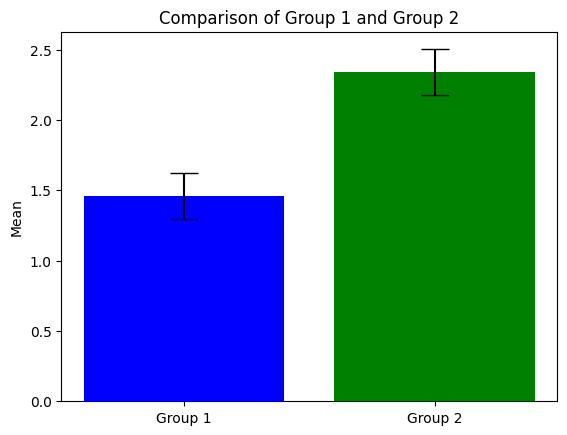

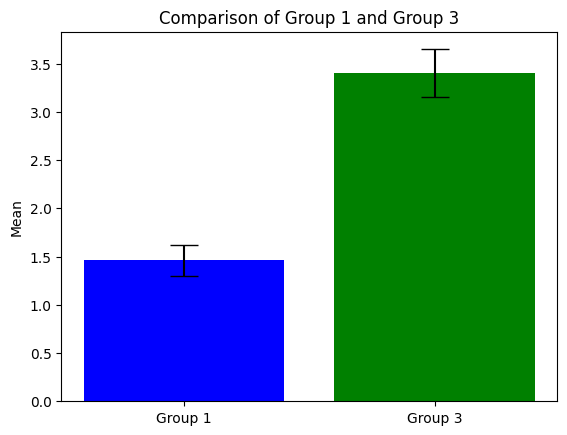

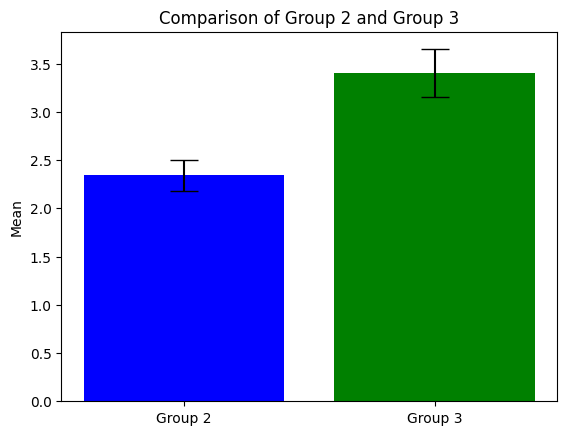

In [80]:
pairwise_t_tests(data)

In [82]:
from typing import Tuple
from statsmodels.stats.power import TTestIndPower

def calculate_sample_size(
    effect_size: float, alpha: float, power: float
) -> Tuple[int, int]:
    """
    Calculate the required sample size for a two-sample independent t-test.

    :param effect_size: The standardized effect size (Cohen's d) to detect.
    :param alpha: The desired significance level (Type I error rate).
    :param power: The desired statistical power (1 - Type II error rate).
    :return: A tuple containing the calculated sample size for each group.
    """
    power_analysis = TTestIndPower()
    sample_size = power_analysis.solve_power(
        effect_size=effect_size, alpha=alpha, power=power, ratio=1.0
    )
    return int(round(sample_size)), int(round(sample_size))


In [84]:
from typing import List
from statsmodels.stats.power import TTestIndPower

def calculate_sample_size(
    effect_size: float, alpha: float, power: float, num_groups: int = 2
) -> List[int]:
    """
    Calculate the required sample size for multiple-group independent t-tests.

    :param effect_size: The standardized effect size (Cohen's d) to detect.
    :param alpha: The desired significance level (Type I error rate).
    :param power: The desired statistical power (1 - Type II error rate).
    :param num_groups: The number of groups (default is 2 for a two-sample t-test).
    :return: A list containing the calculated sample size for each group.
    """
    if num_groups < 2:
        raise ValueError("The number of groups must be at least 2.")

    power_analysis = TTestIndPower()
    sample_size = power_analysis.solve_power(
        effect_size=effect_size, alpha=alpha, power=power, ratio=1.0
    )

    sample_size_per_group = int(round(sample_size))
    return [sample_size_per_group] * num_groups


In [87]:



effect_size = 0.5  # Medium effect size
alpha = 0.05  # 5% significance level
power = 0.8  # 80% statistical power

for num_groups in range(2, 11):
    sample_sizes = calculate_sample_size(effect_size, alpha, power, num_groups)
    print(f"Required sample size for {num_groups} groups: {sample_sizes}")


Required sample size for 2 groups: [64, 64]
Required sample size for 3 groups: [64, 64, 64]
Required sample size for 4 groups: [64, 64, 64, 64]
Required sample size for 5 groups: [64, 64, 64, 64, 64]
Required sample size for 6 groups: [64, 64, 64, 64, 64, 64]
Required sample size for 7 groups: [64, 64, 64, 64, 64, 64, 64]
Required sample size for 8 groups: [64, 64, 64, 64, 64, 64, 64, 64]
Required sample size for 9 groups: [64, 64, 64, 64, 64, 64, 64, 64, 64]
Required sample size for 10 groups: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64]


In [88]:
from typing import List
from statsmodels.stats.power import TTestIndPower

def calculate_sample_size(
    effect_size: float,
    alpha: float,
    power: float,
    ratios: List[float],
) -> List[int]:
    """
    Calculate the required sample size for multiple-group independent t-tests with specified ratios.

    :param effect_size: The standardized effect size (Cohen's d) to detect.
    :param alpha: The desired significance level (Type I error rate).
    :param power: The desired statistical power (1 - Type II error rate).
    :param ratios: A list of ratios for each group (must sum to 1).
    :return: A list containing the calculated sample size for each group.
    """
    if len(ratios) < 2:
        raise ValueError("The number of groups must be at least 2.")

    if not (0.99 <= sum(ratios) <= 1.01):
        raise ValueError("The ratios must sum to 1.")

    power_analysis = TTestIndPower()
    sample_size_total = power_analysis.solve_power(
        effect_size=effect_size, alpha=alpha, power=power, ratio=sum(ratios) / len(ratios)
    )

    sample_sizes = [int(round(sample_size_total * ratio)) for ratio in ratios]
    return sample_sizes


In [90]:

effect_size = 0.5  # Medium effect size
alpha = 0.05  # 5% significance level
power = 0.8  # 80% statistical power

ratios_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.85, 0.05, 0.05, 0.05],
]

for ratios in ratios_list:
    sample_sizes = calculate_sample_size(effect_size, alpha, power, ratios)
    print(f"Required sample size for groups with ratios {ratios}: {sample_sizes}")


Required sample size for groups with ratios [0.25, 0.25, 0.25, 0.25]: [40, 40, 40, 40]
Required sample size for groups with ratios [0.85, 0.05, 0.05, 0.05]: [135, 8, 8, 8]


In [91]:
from typing import List, Tuple
from statsmodels.stats.power import TTestIndPower

def calculate_sample_size(
    effect_size: float,
    alpha: float,
    power: float,
    ratios: List[float],
) -> Tuple[List[int], float]:
    """
    Calculate the required sample size for multiple-group independent t-tests with specified ratios,
    and return the minimum detectable effect.

    :param effect_size: The standardized effect size (Cohen's d) to detect.
    :param alpha: The desired significance level (Type I error rate).
    :param power: The desired statistical power (1 - Type II error rate).
    :param ratios: A list of ratios for each group (must sum to 1).
    :return: A tuple containing a list of the calculated sample size for each group and the MDE.
    """
    if len(ratios) < 2:
        raise ValueError("The number of groups must be at least 2.")

    if not (0.99 <= sum(ratios) <= 1.01):
        raise ValueError("The ratios must sum to 1.")

    power_analysis = TTestIndPower()
    sample_size_total = power_analysis.solve_power(
        effect_size=effect_size, alpha=alpha, power=power, ratio=sum(ratios) / len(ratios)
    )

    sample_sizes = [int(round(sample_size_total * ratio)) for ratio in ratios]
    return sample_sizes, effect_size


In [96]:

effect_size = 0.5  # Medium effect size
alpha = 0.05  # 5% significance level
power = 0.8  # 80% statistical power

ratios_list = [
    [0.25, 0.25, 0.25, 0.25],
    [0.85, 0.05, 0.05, 0.05],
]

for ratios in ratios_list:
    sample_sizes, mde = calculate_sample_size(effect_size, alpha, power, ratios)
    print(f"Required sample size for groups with ratios {ratios}: {sample_sizes}, MDE: {mde}")


Required sample size for groups with ratios [0.25, 0.25, 0.25, 0.25]: [40, 40, 40, 40], MDE: 0.5
Required sample size for groups with ratios [0.85, 0.05, 0.05, 0.05]: [135, 8, 8, 8], MDE: 0.5


In [102]:
import pystats.t_tests


In [103]:
from typing import List, Tuple

def detect_outliers(
    data: List[float], factor: float = 1.5, remove: bool = False
) -> Tuple[List[float], List[int]]:
    """
    Detect outliers in the data using the IQR method.

    :param data: A list of numeric data.
    :param factor: The IQR factor to use for detecting outliers (default: 1.5).
    :param remove: Whether to remove the outliers from the data (default: False).
    :return: A tuple containing the processed data and the indices of the detected outliers.
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    outlier_indices = [
        index for index, value in enumerate(data) if value < lower_bound or value > upper_bound
    ]

    if remove:
        data = [value for value in data if lower_bound <= value <= upper_bound]

    return data, outlier_indices


In [105]:

data = [1.2, 1.3, 1.5, 1.6, 1.7, 3.0, 3.2, 3.4, 3.6, 3.8, 500]
processed_data, outlier_indices = detect_outliers(data, remove=True)

print(f"Processed data (outliers removed): {processed_data}")
print(f"Outlier indices: {outlier_indices}")


Processed data (outliers removed): [1.2, 1.3, 1.5, 1.6, 1.7, 3.0, 3.2, 3.4, 3.6, 3.8]
Outlier indices: [10]


In [106]:
from typing import List, Tuple

def detect_outliers(
    data: List[float], factor: float = 1.5, remove: bool = False
) -> Tuple[List[float], List[int], List[float]]:
    """
    Detect outliers in the data using the IQR method.

    :param data: A list of numeric data.
    :param factor: The IQR factor to use for detecting outliers (default: 1.5).
    :param remove: Whether to remove the outliers from the data (default: False).
    :return: A tuple containing the processed data, the indices of the detected outliers, and the outlier values.
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    outlier_indices = [
        index for index, value in enumerate(data) if value < lower_bound or value > upper_bound
    ]

    outlier_values = [data[index] for index in outlier_indices]

    if remove:
        data = [value for value in data if lower_bound <= value <= upper_bound]

    return data, outlier_indices, outlier_values


In [110]:

data = [1.2, 1.3, 1.5, 1.6, 1.7, 3.0, 3.2, 3.4, 3.6, 3.8, 500]
processed_data, outlier_indices, outlier_values = detect_outliers(data, remove=True)

print(f"Processed data (outliers removed): {processed_data}")
print(f"Outlier indices: {outlier_indices}")
print(f"Outlier values: {outlier_values}")


Processed data (outliers removed): [1.2, 1.3, 1.5, 1.6, 1.7, 3.0, 3.2, 3.4, 3.6, 3.8]
Outlier indices: [10]
Outlier values: [500]


In [112]:
detect_outliers

<function __main__.detect_outliers(data: List[float], factor: float = 1.5, remove: bool = False) -> Tuple[List[float], List[int], List[float]]>

In [111]:
import pandas as pd

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())


In [113]:
import pandas as pd

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)


Summary statistics:
              A         B
count  5.000000  4.000000
mean   3.000000  2.400000
std    1.581139  0.182574
min    1.000000  2.200000
25%    2.000000  2.275000
50%    3.000000  2.400000
75%    4.000000  2.525000
max    5.000000  2.600000

Data types:
A      int64
B    float64
C     object
dtype: object

Missing values:
A    0
B    1
C    0
dtype: int64

Unique values:
A: 5
B: 4
C: 3

First 5 rows:
   A    B       C
0  1  2.2   apple
1  2  2.3  orange
2  3  2.5  banana
3  4  2.6   apple
4  5  NaN  orange


In [114]:
import pandas as pd

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    print(df.corr())


In [117]:

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": [6, 7, 8, 9, 10],
    "D": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)


Summary statistics:
              A         B          C
count  5.000000  4.000000   5.000000
mean   3.000000  2.400000   8.000000
std    1.581139  0.182574   1.581139
min    1.000000  2.200000   6.000000
25%    2.000000  2.275000   7.000000
50%    3.000000  2.400000   8.000000
75%    4.000000  2.525000   9.000000
max    5.000000  2.600000  10.000000

Data types:
A      int64
B    float64
C      int64
D     object
dtype: object

Missing values:
A    0
B    1
C    0
D    0
dtype: int64

Unique values:
A: 5
B: 4
C: 5
D: 3

First 5 rows:
   A    B   C       D
0  1  2.2   6   apple
1  2  2.3   7  orange
2  3  2.5   8  banana
3  4  2.6   9   apple
4  5  NaN  10  orange

Correlations:
          A         B         C
A  1.000000  0.989949  1.000000
B  0.989949  1.000000  0.989949
C  1.000000  0.989949  1.000000

Correlations with background gradient:


/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/779661306.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/779661306.py:30: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = corr.style.background_gradient().set_precision(2)


,A,B,C
A,1.00,0.99,1.00
B,0.99,1.00,0.99
C,1.00,0.99,1.00


In [116]:
import pandas as pd

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    corr = df.corr()
    print(corr)
    
    print("\nCorrelations with background gradient:")
    corr_styled = corr.style.background_gradient().set_precision(2)
    display(corr_styled)


In [118]:

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": [6, 7, 8, 9, 10],
    "D": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)


Summary statistics:
              A         B          C
count  5.000000  4.000000   5.000000
mean   3.000000  2.400000   8.000000
std    1.581139  0.182574   1.581139
min    1.000000  2.200000   6.000000
25%    2.000000  2.275000   7.000000
50%    3.000000  2.400000   8.000000
75%    4.000000  2.525000   9.000000
max    5.000000  2.600000  10.000000

Data types:
A      int64
B    float64
C      int64
D     object
dtype: object

Missing values:
A    0
B    1
C    0
D    0
dtype: int64

Unique values:
A: 5
B: 4
C: 5
D: 3

First 5 rows:
   A    B   C       D
0  1  2.2   6   apple
1  2  2.3   7  orange
2  3  2.5   8  banana
3  4  2.6   9   apple
4  5  NaN  10  orange

Correlations:
          A         B         C
A  1.000000  0.989949  1.000000
B  0.989949  1.000000  0.989949
C  1.000000  0.989949  1.000000

Correlations with background gradient:


/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/779661306.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/779661306.py:30: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = corr.style.background_gradient().set_precision(2)


,A,B,C
A,1.00,0.99,1.00
B,0.99,1.00,0.99
C,1.00,0.99,1.00


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    corr = df.corr()
    print(corr)
    
    print("\nCorrelations with background gradient:")
    corr_styled = corr.style.background_gradient().set_precision(2)
    display(corr_styled)

    print("\nBoxplots:")
    num_cols = df.select_dtypes(include=["number"]).columns
    non_num_cols = df.select_dtypes(exclude=["number"]).columns

    for non_num_col in non_num_cols:
        for num_col in num_cols:
            plt.figure()
            sns.boxplot(x=non_num_col, y=num_col, data=df)
            plt.title(f"Boxplot of {num_col} by {non_num_col}")
            plt.show()


Summary statistics:
              A         B          C
count  5.000000  4.000000   5.000000
mean   3.000000  2.400000   8.000000
std    1.581139  0.182574   1.581139
min    1.000000  2.200000   6.000000
25%    2.000000  2.275000   7.000000
50%    3.000000  2.400000   8.000000
75%    4.000000  2.525000   9.000000
max    5.000000  2.600000  10.000000

Data types:
A      int64
B    float64
C      int64
D     object
dtype: object

Missing values:
A    0
B    1
C    0
D    0
dtype: int64

Unique values:
A: 5
B: 4
C: 5
D: 3

First 5 rows:
   A    B   C       D
0  1  2.2   6   apple
1  2  2.3   7  orange
2  3  2.5   8  banana
3  4  2.6   9   apple
4  5  NaN  10  orange

Correlations:
          A         B         C
A  1.000000  0.989949  1.000000
B  0.989949  1.000000  0.989949
C  1.000000  0.989949  1.000000

Correlations with background gradient:


/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/1591907644.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/1591907644.py:32: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = corr.style.background_gradient().set_precision(2)


,A,B,C
A,1.00,0.99,1.00
B,0.99,1.00,0.99
C,1.00,0.99,1.00



Boxplots:


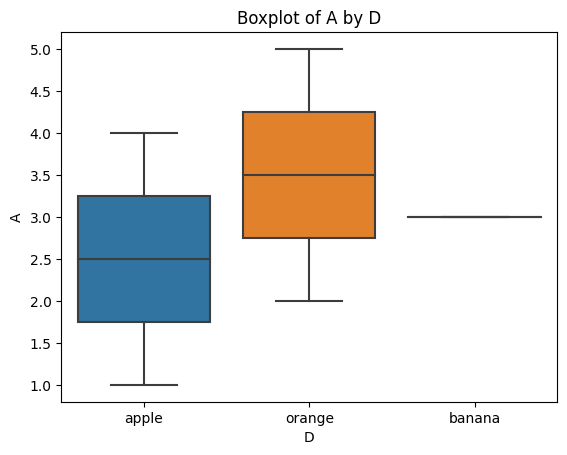

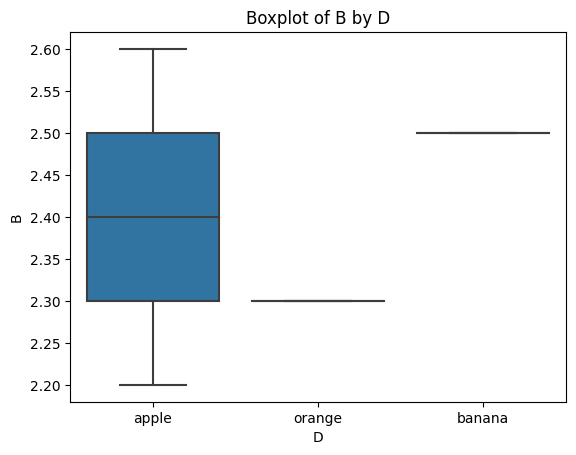

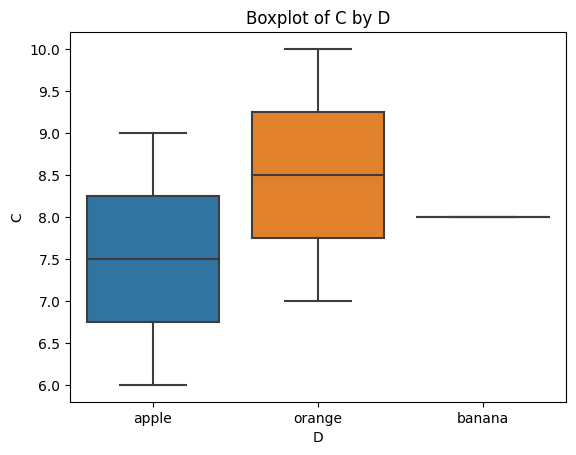

In [120]:

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": [6, 7, 8, 9, 10],
    "D": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)


In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    corr = df.corr()
    print(corr)
    
    print("\nCorrelations with background gradient:")
    corr_styled = corr.style.background_gradient().set_precision(2)
    display(corr_styled)

    print("\nBoxplots:")
    num_cols = df.select_dtypes(include=["number"]).columns
    non_num_cols = df.select_dtypes(exclude=["number"]).columns

    for non_num_col in non_num_cols:
        for num_col in num_cols:
            plt.figure()
            sns.boxplot(x=non_num_col, y=num_col, data=df)
            plt.title(f"Boxplot of {num_col} by {non_num_col}")
            plt.show()

    print("\nDistribution plots:")
    for num_col in num_cols:
        plt.figure()
        sns.displot(df[num_col], kde=True)
        plt.title(f"Distribution plot of {num_col}")
        plt.show()


In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    corr = df.corr()
    print(corr)
    
    print("\nCorrelations with background gradient:")
    corr_styled = corr.style.background_gradient().set_precision(2)
    display(corr_styled)

    print("\nBoxplots:")
    num_cols = df.select_dtypes(include=["number"]).columns
    non_num_cols = df.select_dtypes(exclude=["number"]).columns

    for non_num_col in non_num_cols:
        for num_col in num_cols:
            plt.figure()
            sns.boxplot(x=non_num_col, y=num_col, data=df)
            plt.title(f"Boxplot of {num_col} by {non_num_col}")
            plt.show()

    print("\nDistribution plots:")
    for num_col in num_cols:
        plt.figure()
        sns.displot(df[num_col], kde=True)
        plt.title(f"Distribution plot of {num_col}")
        plt.show()

    print("\nCountplots:")
    for non_num_col in non_num_cols:
        plt.figure()
        sns.countplot(x=non_num_col, data=df)
        plt.title(f"Countplot of {non_num_col}")
        plt.show()


In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def basic_eda(df: pd.DataFrame) -> None:
    """
    Perform basic exploratory data analysis on a DataFrame's columns.

    :param df: A pandas DataFrame.
    """
    print("Summary statistics:")
    print(df.describe())
    
    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nCorrelations:")
    corr = df.corr()
    print(corr)
    
    print("\nCorrelations with background gradient:")
    corr_styled = corr.style.background_gradient().set_precision(2)
    display(corr_styled)

    print("\nBoxplots:")
    num_cols = df.select_dtypes(include=["number"]).columns
    non_num_cols = df.select_dtypes(exclude=["number"]).columns

    for non_num_col in non_num_cols:
        for num_col in num_cols:
            plt.figure()
            sns.boxplot(x=non_num_col, y=num_col, data=df)
            plt.title(f"Boxplot of {num_col} by {non_num_col}")
            plt.show()

    print("\nDistribution plots:")
    for num_col in num_cols:
        plt.figure()
        sns.displot(df[num_col], kde=True)
        plt.title(f"Distribution plot of {num_col}")
        plt.show()

    print("\nCountplots:")
    for non_num_col in non_num_cols:
        plt.figure()
        sns.countplot(x=non_num_col, data=df)
        plt.title(f"Countplot of {non_num_col}")
        plt.show()

    print("\nCorrelation Heatmap:")
    plt.figure()
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap')
    plt.show()


Summary statistics:
              A         B          C
count  5.000000  4.000000   5.000000
mean   3.000000  2.400000   8.000000
std    1.581139  0.182574   1.581139
min    1.000000  2.200000   6.000000
25%    2.000000  2.275000   7.000000
50%    3.000000  2.400000   8.000000
75%    4.000000  2.525000   9.000000
max    5.000000  2.600000  10.000000

Data types:
A      int64
B    float64
C      int64
D     object
dtype: object

Missing values:
A    0
B    1
C    0
D    0
dtype: int64

Unique values:
A: 5
B: 4
C: 5
D: 3

First 5 rows:
   A    B   C       D
0  1  2.2   6   apple
1  2  2.3   7  orange
2  3  2.5   8  banana
3  4  2.6   9   apple
4  5  NaN  10  orange

Correlations:
          A         B         C
A  1.000000  0.989949  1.000000
B  0.989949  1.000000  0.989949
C  1.000000  0.989949  1.000000

Correlations with background gradient:


/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/4124624798.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/1h/dsxf52596sl3nhrrkw898q740000gn/T/ipykernel_2604/4124624798.py:32: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = corr.style.background_gradient().set_precision(2)


,A,B,C
A,1.00,0.99,1.00
B,0.99,1.00,0.99
C,1.00,0.99,1.00



Boxplots:


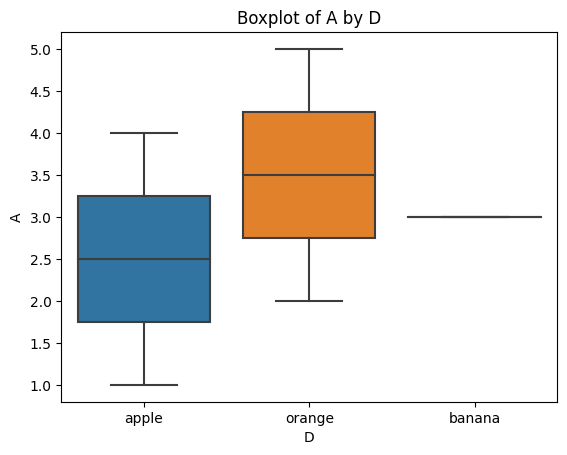

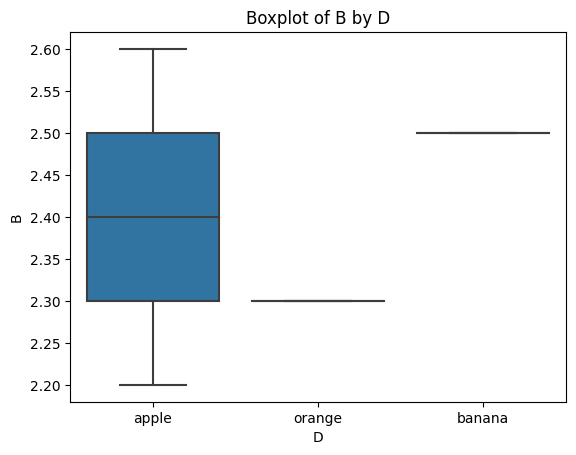

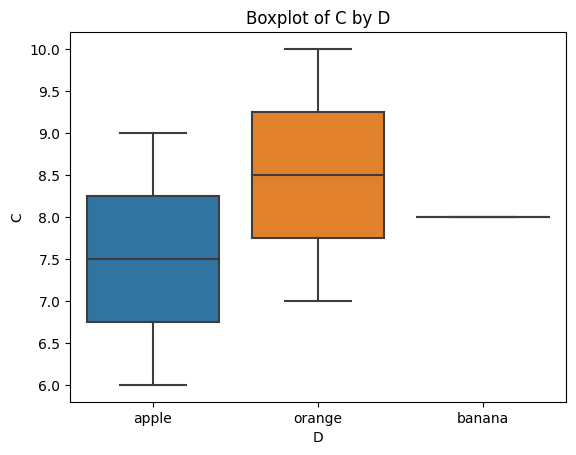


Distribution plots:


<Figure size 640x480 with 0 Axes>

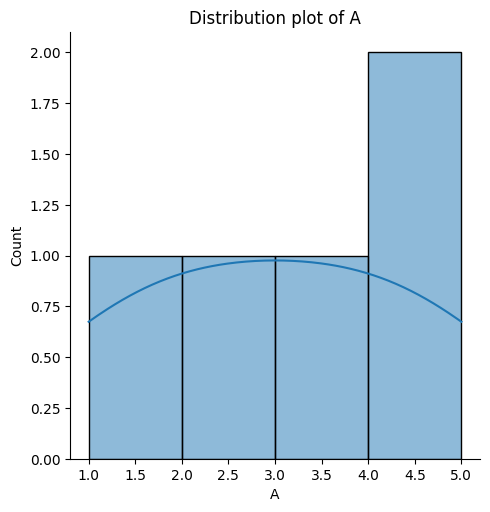

<Figure size 640x480 with 0 Axes>

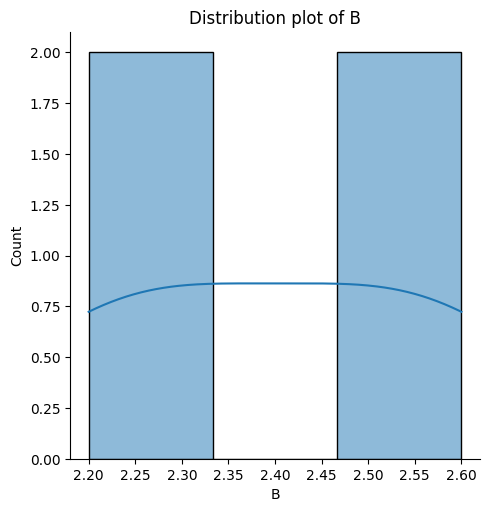

<Figure size 640x480 with 0 Axes>

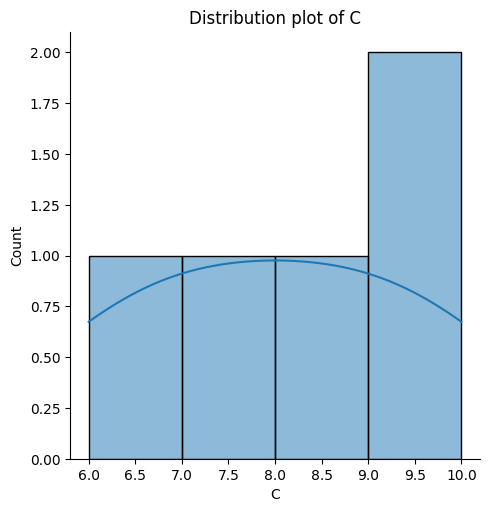


Countplots:


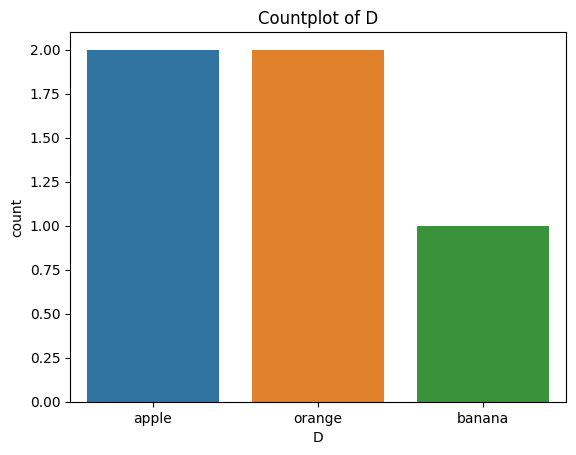


Correlation Heatmap:


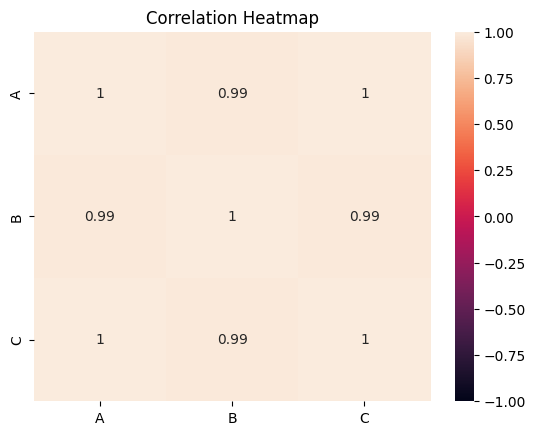

In [126]:

data = {
    "A": [1, 2, 3, 4, 5],
    "B": [2.2, 2.3, 2.5, 2.6, None],
    "C": [6, 7, 8, 9, 10],
    "D": ["apple", "orange", "banana", "apple", "orange"],
}

df = pd.DataFrame(data)
basic_eda(df)
